In [1]:
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

# Subtract mean, save matrices separately

In [2]:
data = np.load("sparse_mat.npy")

In [3]:
data = data.reshape(1)[0]

In [4]:
data

<824876x2188 sparse matrix of type '<type 'numpy.int64'>'
	with 119391961 stored elements in COOrdinate format>

In [5]:
data_csr = data.tocsr()

In [7]:
%%time
data_csr = data_csr - data_csr.mean(1)

CPU times: user 18 s, sys: 37 s, total: 55 s
Wall time: 2min 1s


In [8]:
norm = data_csr.shape[1]-1.

In [9]:
np.save('mean_subtracted', data_csr)

In [10]:
type(data_csr)

numpy.matrixlib.defmatrix.matrix

In [11]:
data_csr.shape

(824876, 2188)

In [20]:
data_csr[:5]

matrix([[-0.00182815, -0.00182815, -0.00182815, ..., -0.00182815,
         -0.00182815, -0.00182815],
        [-0.00182815, -0.00182815, -0.00182815, ..., -0.00182815,
         -0.00182815, -0.00182815],
        [-0.00045704, -0.00045704, -0.00045704, ..., -0.00045704,
         -0.00045704, -0.00045704],
        [-0.00137112, -0.00137112, -0.00137112, ..., -0.00137112,
         -0.00137112, -0.00137112],
        [-0.27239488, -0.27239488, -0.27239488, ..., -0.27239488,
         -0.27239488, -0.27239488]])

In [23]:
data_csr = np.split(data_csr, 26, axis=0)

In [29]:
for sub in range(len(data_csr)):
    np.save('mat%d' % sub, data_csr[sub])

In [10]:
norm

2187.0

# Calculate covar for each matrix

In [2]:
norm = 2187.0

In [ ]:
'''
%%time
C = data_csr.dot(data_csr.transpose())/norm
'''

In [16]:
mat0 = np.load('mat0.npy')

In [20]:
%%time
cov0 = np.dot(mat0.T, mat0.conj()) / norm

CPU times: user 10.9 s, sys: 1.36 s, total: 12.3 s
Wall time: 3.84 s


In [24]:
%%time
covars = []
for sub in range(26):
    mat = np.load('mat%d.npy' % sub)
    cov = np.dot(mat.T, mat.conj()) / norm
    covars.append(cov)
    print "got cov for mat%d" % sub

got cov for mat0
got cov for mat1
got cov for mat2
got cov for mat3
got cov for mat4
got cov for mat5
got cov for mat6
got cov for mat7
got cov for mat8
got cov for mat9
got cov for mat10
got cov for mat11
got cov for mat12
got cov for mat13
got cov for mat14
got cov for mat15
got cov for mat16
got cov for mat17
got cov for mat18
got cov for mat19
got cov for mat20
got cov for mat21
got cov for mat22
got cov for mat23
got cov for mat24
got cov for mat25
CPU times: user 4min 49s, sys: 44.6 s, total: 5min 33s
Wall time: 1min 57s


In [31]:
covariance_mat = covars[0]
for mat in range(1,len(covars)):
    covariance_mat = np.add(covariance_mat, covars[mat])

In [34]:
covariance_mat

array([[ 11.18099083,   0.65722254,   0.4178293 , ...,   0.63072706,
          0.17374927,   0.82270492],
       [  0.65722254,  11.42426357,   0.33256123, ...,   1.14033782,
          0.78578344,   0.30076561],
       [  0.4178293 ,   0.33256123,  11.61534449, ...,   0.15151614,
          0.59714466,   0.59132207],
       ..., 
       [  0.63072706,   1.14033782,   0.15151614, ...,  11.824862  ,
          0.67972692,   0.41510232],
       [  0.17374927,   0.78578344,   0.59714466, ...,   0.67972692,
         11.40930606,   0.06923565],
       [  0.82270492,   0.30076561,   0.59132207, ...,   0.41510232,
          0.06923565,  11.92395261]])

In [35]:
np.save('covariance_mat', covariance_mat)

# Visualize the covariance

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
covariance = np.load('covariance_mat.npy')

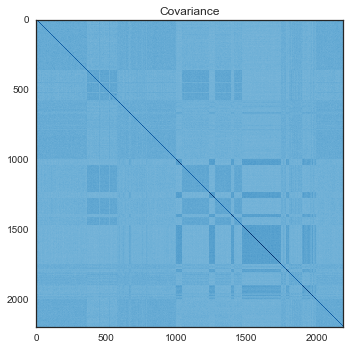

In [29]:
vmax = covariance.max()
plt.imshow(covariance, interpolation='nearest', vmin=-vmax, vmax=vmax, cmap='Blues', alpha=1)
plt.title('Covariance')
plt.show()

# Perform the above on the pairwise column collapsed data

In [2]:
data = np.load('condensed_impute.npy.npz')

In [3]:
data

In [4]:
data.files

['arr_0']

In [8]:
data = data['arr_0']

In [10]:
data.shape

(824876, 1094)

In [11]:
data = csr_matrix(data)

In [12]:
%%time
data = data - data.mean(1)

CPU times: user 8.56 s, sys: 18.9 s, total: 27.4 s
Wall time: 48.1 s


In [13]:
norm = data.shape[1]-1.

In [15]:
norm

1093.0

### partition the data for faster computation

In [16]:
data = np.split(data, 26, axis=0)

In [18]:
for sub in range(len(data)):
    np.save('mat%d' % sub, data[sub])

### reload/compute/save

In [2]:
norm = 1093.0

In [3]:
%%time
covars = []
for sub in range(26):
    mat = np.load('mat%d.npy' % sub)
    cov = np.dot(mat.T, mat.conj()) / norm
    covars.append(cov)
    print "got cov for mat%d" % sub

got cov for mat0
got cov for mat1
got cov for mat2
got cov for mat3
got cov for mat4
got cov for mat5
got cov for mat6
got cov for mat7
got cov for mat8
got cov for mat9
got cov for mat10
got cov for mat11
got cov for mat12
got cov for mat13
got cov for mat14
got cov for mat15
got cov for mat16
got cov for mat17
got cov for mat18
got cov for mat19
got cov for mat20
got cov for mat21
got cov for mat22
got cov for mat23
got cov for mat24
got cov for mat25
CPU times: user 1min 17s, sys: 12.6 s, total: 1min 30s
Wall time: 36.1 s


In [4]:
covariance_mat = covars[0]
for mat in range(1,len(covars)):
    covariance_mat = np.add(covariance_mat, covars[mat])

In [5]:
covariance_mat

array([[ 47.8612834 ,   3.76675464,   4.51771764, ...,   5.19498582,
          6.71634578,   4.16791225],
       [  3.76675464,  47.21476935,   6.4515512 , ...,   1.79030153,
          2.11952974,   4.10266072],
       [  4.51771764,   6.4515512 ,  47.97744558, ...,   3.36285648,
          1.21358515,   4.33029343],
       ..., 
       [  5.19498582,   1.79030153,   3.36285648, ...,  46.54790141,
          4.23852029,   2.57389281],
       [  6.71634578,   2.11952974,   1.21358515, ...,   4.23852029,
         48.37744658,   5.05774133],
       [  4.16791225,   4.10266072,   4.33029343, ...,   2.57389281,
          5.05774133,  46.96493452]])

In [6]:
np.save('covariance_mat_collapsed', covariance_mat)

## Visualize 2

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

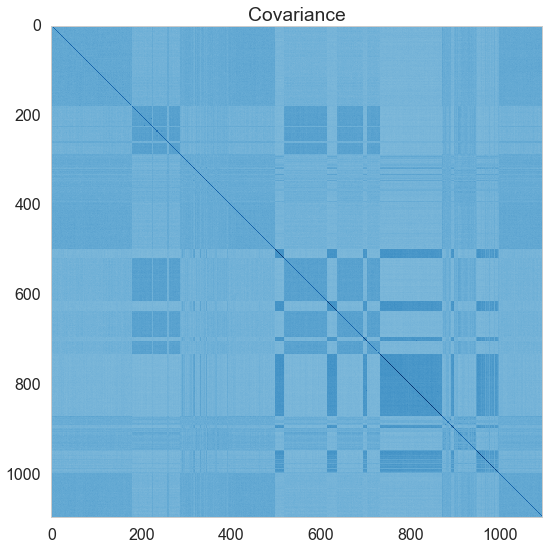

In [9]:
vmax = covariance_mat.max()
plt.imshow(covariance_mat, interpolation='nearest', vmin=-vmax, vmax=vmax, cmap='Blues', alpha=1)
plt.title('Covariance')
plt.grid(False)
plt.show()